![title](hacker_news.jpg)

In [1]:
import csv

opened_file = open('HN_posts_year_to_Sep_26_2016.csv', 'r')
read_file = csv.reader(opened_file)
hacker_news_list = list(read_file)
hacker_news_header = hacker_news_list[0]
hn = hacker_news_list[1:]

print('File headers: ', '\n', hacker_news_header)
print('\n')
print('First 5 rows of the file: ', '\n', hn[:5])

File headers:  
 ['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']


First 5 rows of the file:  
 [['12579008', 'You have two days to comment if you want stem cells to be classified as your own', 'http://www.regulations.gov/document?D=FDA-2015-D-3719-0018', '1', '0', 'altstar', '9/26/2016 3:26'], ['12579005', 'SQLAR  the SQLite Archiver', 'https://www.sqlite.org/sqlar/doc/trunk/README.md', '1', '0', 'blacksqr', '9/26/2016 3:24'], ['12578997', 'What if we just printed a flatscreen television on the side of our boxes?', 'https://medium.com/vanmoof/our-secrets-out-f21c1f03fdc8#.ietxmez43', '1', '0', 'pavel_lishin', '9/26/2016 3:19'], ['12578989', 'algorithmic music', 'http://cacm.acm.org/magazines/2011/7/109891-algorithmic-composition/fulltext', '1', '0', 'poindontcare', '9/26/2016 3:16'], ['12578979', 'How the Data Vault Enables the Next-Gen Data Warehouse and Data Lake', 'https://www.talend.com/blog/2016/05/12/talend-and-脗聯the-data-vault脗聰', '1', '0', 'markgai

In [2]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line after each row

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))
        
def check_rows(data_list):
    n_row0 = len(data_list[0])
    i = 0
    for row in data_list:
        n_row = len(row)
        i += 1
        n = 0
        if n_row != n_row0:
            print(i-1, row)
            n += 1
    if n == 0:
        print('All the rows have the same number of columns!')

In [3]:
explore_data(hn, 0, 10, True)

['12579008', 'You have two days to comment if you want stem cells to be classified as your own', 'http://www.regulations.gov/document?D=FDA-2015-D-3719-0018', '1', '0', 'altstar', '9/26/2016 3:26']


['12579005', 'SQLAR  the SQLite Archiver', 'https://www.sqlite.org/sqlar/doc/trunk/README.md', '1', '0', 'blacksqr', '9/26/2016 3:24']


['12578997', 'What if we just printed a flatscreen television on the side of our boxes?', 'https://medium.com/vanmoof/our-secrets-out-f21c1f03fdc8#.ietxmez43', '1', '0', 'pavel_lishin', '9/26/2016 3:19']


['12578989', 'algorithmic music', 'http://cacm.acm.org/magazines/2011/7/109891-algorithmic-composition/fulltext', '1', '0', 'poindontcare', '9/26/2016 3:16']


['12578979', 'How the Data Vault Enables the Next-Gen Data Warehouse and Data Lake', 'https://www.talend.com/blog/2016/05/12/talend-and-脗聯the-data-vault脗聰', '1', '0', 'markgainor1', '9/26/2016 3:14']


['12578975', 'Saving the Hassle of Shopping', 'https://blog.menswr.com/2016/09/07/whats-new-wit

In [4]:
check_rows('hn')

All the rows have the same number of columns!


We are only interested in posts begin with either 'Ask HN' or 'Show HN'.

In [5]:
ask_posts = []
show_posts = []
other_posts = []

for row in hn:
    row[1] = row[1].lower()
    title_string = row[1]
    if title_string.startswith('ask hn') == True:
        ask_posts.append(row)
    elif title_string.startswith('show hn') == True:
        show_posts.append(row)
    else:
        other_posts.append(row)
        
print('Ask HN posts: ', '\n', ask_posts[:5], '\n')
print('Show HN posts: ', '\n', show_posts[:5], '\n')
print('Other HN posts: ', '\n', other_posts[:5], '\n')

Ask HN posts:  
 [['12578908', 'ask hn: what tld do you use for local development?', '', '4', '7', 'Sevrene', '9/26/2016 2:53'], ['12578522', 'ask hn: how do you pass on your work when you die?', '', '6', '3', 'PascLeRasc', '9/26/2016 1:17'], ['12577908', 'ask hn: how a dns problem can be limited to a geographic region?', '', '1', '0', 'kuon', '9/25/2016 22:57'], ['12577870', 'ask hn: why join a fund when you can be an angel?', '', '1', '3', 'anthony_james', '9/25/2016 22:48'], ['12577647', 'ask hn: someone uses stock trading as passive income?', '', '5', '2', '00taffe', '9/25/2016 21:50']] 

Show HN posts:  
 [['12578335', 'show hn: finding puns computationally', 'http://puns.samueltaylor.org/', '2', '0', 'saamm', '9/26/2016 0:36'], ['12578182', 'show hn: a simple library for complicated animations', 'https://christinecha.github.io/choreographer-js/', '1', '0', 'christinecha', '9/26/2016 0:01'], ['12578098', 'show hn: webgl visualization of dna sequences', 'http://grondilu.github.io/d

In [6]:
print('The number of Ask Posts: ', len(ask_posts))
print('The number of Show Posts: ', len(show_posts))
print('The number of Other Posts: ', len(other_posts))

The number of Ask Posts:  9139
The number of Show Posts:  10158
The number of Other Posts:  273822


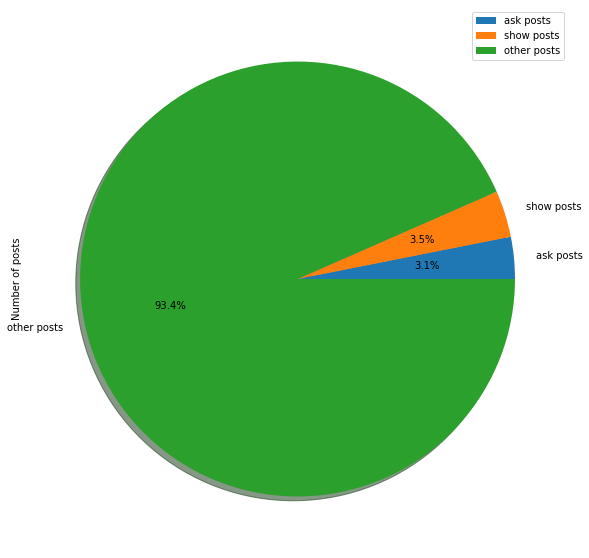

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# initialize list of lists 
[['tom', 10], ['nick', 15], ['juli', 14]] 
share_of_post_kind = [['ask posts', len(ask_posts)], ['show posts',len(show_posts)], ['other posts', len(other_posts)]]
  
# Create the pandas DataFrame 
df_share_of_post_kind = pd.DataFrame(share_of_post_kind, columns=['posts type', 'Number of posts'])
df_share_of_post_kind = df_share_of_post_kind.set_index('posts type')

df_share_of_post_kind['Number of posts'].plot(kind='pie', figsize=(20,10), autopct='%1.1f%%', shadow=True,)
plt.legend()

Determine if ask posts or show posts receive more comments on average

In [8]:
sum_comments_ask_posts = 0
sum_comments_show_posts = 0
sum_comments_other_posts = 0

average_comments_ask_posts = 0
average_comments_show_posts = 0
average_comments_other_posts = 0

for row in ask_posts:
    num_comments = int(row[4])
    sum_comments_ask_posts += num_comments
average_comments_ask_posts = sum_comments_ask_posts / len(ask_posts)

print('Total number of comments from ask posts: ', sum_comments_ask_posts)
print('Average number of comments from ask posts: %.2f' % average_comments_ask_posts, '\n')

for row in show_posts:
    num_comments = int(row[4])
    sum_comments_show_posts += num_comments
average_comments_show_posts = sum_comments_show_posts / len(show_posts)

print('Total number of comments from show posts: ', sum_comments_show_posts)
print('Average number of comments from show posts: %.2f' % average_comments_show_posts, '\n')

for row in other_posts:
    num_comments = int(row[4])
    sum_comments_other_posts += num_comments
average_comments_other_posts = sum_comments_other_posts / len(other_posts)

print('Total number of comments from other posts: ', sum_comments_other_posts)
print('Average number of comments from other posts: %.2f' % average_comments_other_posts, '\n')

Total number of comments from ask posts:  94986
Average number of comments from ask posts: 10.39 

Total number of comments from show posts:  49633
Average number of comments from show posts: 4.89 

Total number of comments from other posts:  1768142
Average number of comments from other posts: 6.46 



###### We can see ask posts have more average number of comments than other two types of posts.
###### We need to determine of ask posts created at a certain time are more likely to attract comments. We'll also see if certain time of the day receive more comments.

In [9]:
import datetime as dt

In [10]:
ask_posts_result_list = [] # empty list of list

for row in ask_posts:
    created_at = row[6]
    num_comments = int(row[4])
    
    row_result = [created_at, num_comments]
    ask_posts_result_list.append(row_result)

print(ask_posts_result_list[:5])

[['9/26/2016 2:53', 7], ['9/26/2016 1:17', 3], ['9/25/2016 22:57', 0], ['9/25/2016 22:48', 3], ['9/25/2016 21:50', 2]]


In [11]:
number_of_ask_posts_by_hour = {}
comments_by_hour = {}

for row in ask_posts_result_list:
    temp_datetime = row[0]
    datetime_info = dt.datetime.strptime(temp_datetime, '%m/%d/%Y %H:%M')
    
    hour = datetime_info.strftime('%H')
    num_comments = row[1]
    
    if hour in number_of_ask_posts_by_hour:
        number_of_ask_posts_by_hour[hour] += 1
    else:
        number_of_ask_posts_by_hour[hour] = 1
        
    if hour in comments_by_hour:
        comments_by_hour[hour] += num_comments
    else:
        comments_by_hour[hour] = num_comments
    
print(number_of_ask_posts_by_hour, '\n')
print(comments_by_hour)    

{'02': 269, '01': 282, '22': 383, '21': 518, '19': 552, '17': 587, '15': 646, '14': 513, '13': 444, '11': 312, '10': 282, '09': 222, '07': 226, '03': 271, '23': 343, '20': 510, '16': 579, '08': 257, '00': 301, '18': 614, '12': 342, '04': 243, '06': 234, '05': 209} 

{'02': 2996, '01': 2089, '22': 3372, '21': 4500, '19': 3954, '17': 5547, '15': 18525, '14': 4972, '13': 7245, '11': 2797, '10': 3013, '09': 1477, '07': 1585, '03': 2154, '23': 2297, '20': 4462, '16': 4466, '08': 2362, '00': 2277, '18': 4877, '12': 4234, '04': 2360, '06': 1587, '05': 1838}


Create a list stores month, number of ask posts by hour, number of comments by hour, and average number of comments by hour.

In [12]:
list_ask_posts = []

for hour in number_of_ask_posts_by_hour:
    average_comments_per_posts = comments_by_hour[hour] / number_of_ask_posts_by_hour[hour]
    list_ask_posts.append([hour, number_of_ask_posts_by_hour[hour], comments_by_hour[hour], average_comments_per_posts])

list_ask_posts.sort(key=lambda x: x[0])

print('List of ask posts', '\n', list_ask_posts)

List of ask posts 
 [['00', 301, 2277, 7.5647840531561465], ['01', 282, 2089, 7.407801418439717], ['02', 269, 2996, 11.137546468401487], ['03', 271, 2154, 7.948339483394834], ['04', 243, 2360, 9.7119341563786], ['05', 209, 1838, 8.794258373205741], ['06', 234, 1587, 6.782051282051282], ['07', 226, 1585, 7.013274336283186], ['08', 257, 2362, 9.190661478599221], ['09', 222, 1477, 6.653153153153153], ['10', 282, 3013, 10.684397163120567], ['11', 312, 2797, 8.96474358974359], ['12', 342, 4234, 12.380116959064328], ['13', 444, 7245, 16.31756756756757], ['14', 513, 4972, 9.692007797270955], ['15', 646, 18525, 28.676470588235293], ['16', 579, 4466, 7.713298791018998], ['17', 587, 5547, 9.449744463373083], ['18', 614, 4877, 7.94299674267101], ['19', 552, 3954, 7.163043478260869], ['20', 510, 4462, 8.749019607843136], ['21', 518, 4500, 8.687258687258687], ['22', 383, 3372, 8.804177545691905], ['23', 343, 2297, 6.696793002915452]]


Modify the list to make it easier to read.

In [13]:
final_list_ask_posts = []

for item in list_ask_posts:
    time = item[0]
    time = dt.datetime.strptime(time, '%H')
    time = dt.datetime.strftime(time, '%H:%M')
    print('{} {:.2f} average comments per post'.format(time, item[3]))
    
    final_list_ask_posts.append([time, item[1], item[2], item[3]])

00:00 7.56 average comments per post
01:00 7.41 average comments per post
02:00 11.14 average comments per post
03:00 7.95 average comments per post
04:00 9.71 average comments per post
05:00 8.79 average comments per post
06:00 6.78 average comments per post
07:00 7.01 average comments per post
08:00 9.19 average comments per post
09:00 6.65 average comments per post
10:00 10.68 average comments per post
11:00 8.96 average comments per post
12:00 12.38 average comments per post
13:00 16.32 average comments per post
14:00 9.69 average comments per post
15:00 28.68 average comments per post
16:00 7.71 average comments per post
17:00 9.45 average comments per post
18:00 7.94 average comments per post
19:00 7.16 average comments per post
20:00 8.75 average comments per post
21:00 8.69 average comments per post
22:00 8.80 average comments per post
23:00 6.70 average comments per post


In [14]:
print('Top 5 hours for ask posts comments')
list_ask_posts.sort(key=lambda x: x[3], reverse=True)

for item in list_ask_posts[:5]:
    time = item[0]
    time = dt.datetime.strptime(time, '%H')
    time = dt.datetime.strftime(time, '%H:%M')
    print('{} {:.2f} average comments per post'.format(time, item[3]))

Top 5 hours for ask posts comments
15:00 28.68 average comments per post
13:00 16.32 average comments per post
12:00 12.38 average comments per post
02:00 11.14 average comments per post
10:00 10.68 average comments per post


Text(0.5, 1.0, 'Number of ask posts at the time of the day')

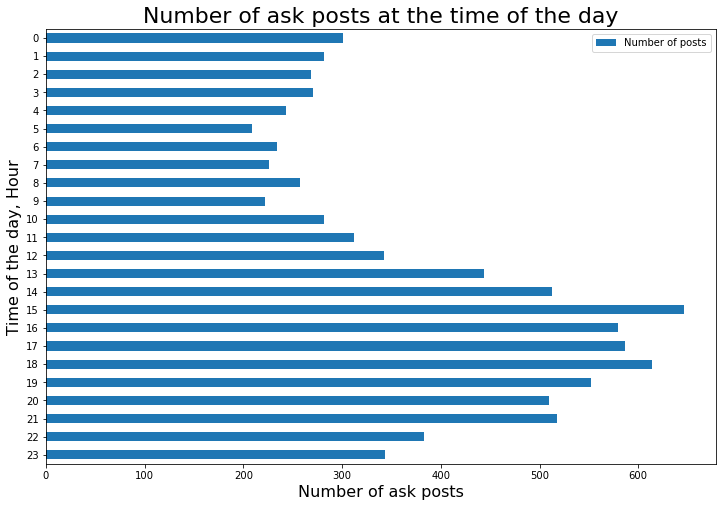

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

final_headers = ['Time of the day', 'Number of posts', 'Number of comments', 'Average comments per post']

df_final = pd.DataFrame(final_list_ask_posts, columns=final_headers)
df_final = df_final.sort_values(df_final.columns[0], ascending = False)

df_final[['Time of the day', 'Number of posts']].plot(kind='barh', figsize=(12,8))

plt.xlabel('Number of ask posts', fontsize=16)
plt.ylabel('Time of the day, Hour', fontsize=16)
plt.title('Number of ask posts at the time of the day', fontsize=22)

Text(0.5, 1.0, 'Number of comments at the time of the day')

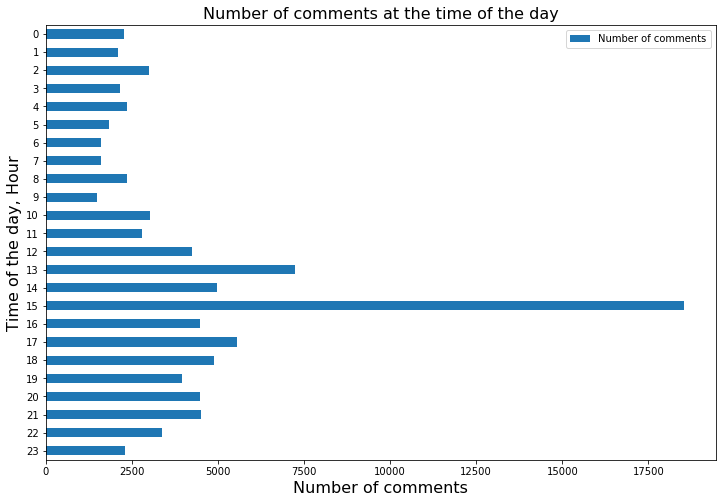

In [16]:
df_final[['Time of the day', 'Number of comments']].plot(kind='barh', figsize=(12,8))

plt.xlabel('Number of comments', fontsize=16)
plt.ylabel('Time of the day, Hour', fontsize=16)
plt.title('Number of comments at the time of the day', fontsize=16)

Text(0.5, 1.0, 'Average comments per ask post at the time of the day')

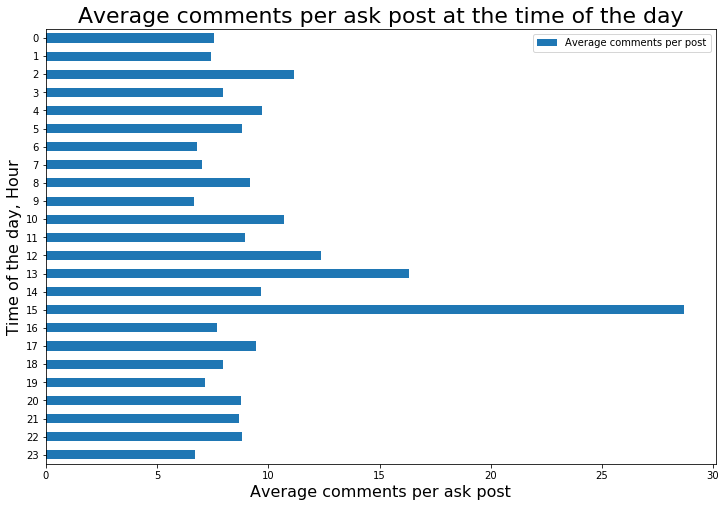

In [17]:
df_final[['Time of the day', 'Average comments per post']].plot(kind='barh', figsize=(12,8))

plt.xlabel('Average comments per ask post', fontsize=16)
plt.ylabel('Time of the day, Hour', fontsize=16)
plt.title('Average comments per ask post at the time of the day', fontsize=22)